# Simple Linear Regression of Blood Glucose Level

Data downloaded from Kaggle at https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Importing Packages

In [1]:
##Import packages

#Data Processing
import pandas as pd
import numpy as np

#Finding the data on our system
import pathlib

#Linear regression
from sklearn import linear_model

#Metrics to evaluate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Plotting library
import matplotlib.pyplot as plt

## Importing Data

In [2]:
##Import data from another directory

#Find the file
p = str(pathlib.Path().resolve()).replace("\\Notebooks\\SciKit-Learn Regression", "")
p += ("\\Data\\Raw\\Pima_Indians.csv")
p = pathlib.Path(p).resolve()

#Read into a pandas dataframe
df = pd.read_csv(p)

#Preview the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Removing Unused Columns from Data

Not all of the columns in this dataset are necessarily useful. Generally, we would consider removing such columns, but those in this dataset are all useful to us from a first look.

We might consider removing the outcome column, due to it being a part of a classification problem, in predicting if a patient has diabetes. This column can have some use in this problem, due to our knowledge of this affecting the glucose levels of a patient. We will keep this column for that reason.

## Removing Rows for Test Data

A vital part of machine learning is being able to test with data that the model is not trained on. This means that we can test the generalisability of our regression with this data. Therefore, we take the first 100 rows from the dataset to be the test dataset. This can also be done randomly.

We also rename the training portions of the data accordingly.

In [3]:
#Find test data
test_data = df[:100]

#Seperate into x and y
test_y = test_data["Glucose"]
test_x = test_data.drop(["Glucose"], axis=1)

#Remove test data from the original dataset
df = df.drop(list(range(0, 100)))

In [4]:
## Rename training data columns
training_y = df["Glucose"]
training_x = df.drop(["Glucose"], axis=1)

## Testing for Multicollinearity

As explained in the main article, multicollinearity is a problem for data used in a regression, so we want to test for this before performing the regression. This can be done easily with `df.corr()`, producing a correlation matrix between each variable in the DataFrame.

We can also plot a graph of the correlation between independent variables, with matplotlib's `imshow`, and a colour map. This allows us to easily see areas with high correlation.

A good limit to consider is a correlation of over 0.8 being highly collinear, such that we would have to do something about it. We have some concern about the correlations between "Age" and "Pregnancies", and "Outcome" and "Glucose", but neither of these reach our limit to be removed.

As such, we can continue as planned, without removing any columns.

In [5]:
#Display a matrix of correlation coefficients (r)
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.113189,0.130772,-0.066313,-0.063370,0.016777,-0.006184,0.547610,0.223926
Glucose,0.113189,1.000000,0.132145,0.059059,0.311685,0.209797,0.122709,0.240402,0.471590
BloodPressure,0.130772,0.132145,1.000000,0.215104,0.084851,0.255337,0.027735,0.214193,0.055183
SkinThickness,-0.066313,0.059059,0.215104,1.000000,0.436832,0.399780,0.189026,-0.128545,0.069508
Insulin,-0.063370,0.311685,0.084851,0.436832,1.000000,0.204153,0.206159,-0.089642,0.114973
BMI,0.016777,0.209797,0.255337,0.399780,0.204153,1.000000,0.115314,0.006592,0.293575
DiabetesPedigreeFunction,-0.006184,0.122709,0.027735,0.189026,0.206159,0.115314,1.000000,0.012968,0.176839
Age,0.547610,0.240402,0.214193,-0.128545,-0.089642,0.006592,0.012968,1.000000,0.218480
Outcome,0.223926,0.471590,0.055183,0.069508,0.114973,0.293575,0.176839,0.218480,1.000000


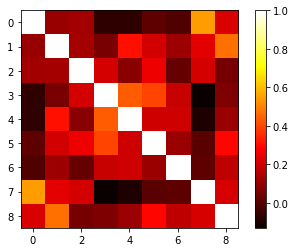

In [6]:
plt.imshow(corr, cmap="hot")
plt.colorbar()

## Training Regression Model

Next, we use the data to train our linear regression model, with SciKit-Learn

In [7]:
#Linear Regression Object
reg = linear_model.LinearRegression()

#Fit the linear regression model with our training data
reg.fit(training_x, training_y)

LinearRegression()

## Evalutating Fit of Model

To evaluate the fit of the model, we compare predicted values using the model to the true values observed. The test values are an important indicator, as we can see if our model generalises to more data points from the same set, without having to be trained on these.

This is done using `model.predict(true_value, predicted_value)`

### Mean Squared Error

One easy way to evaluate the fit of our model is to look at the Mean Squared Error (MSE) of our model. This can be done for both the training and test data sets.

The error here is quite large compared to the value of the glucose. This generally indicates that our predictions won't be the best, and that we could consider a different regressional method.

In [8]:
#Predict values using the regression model 

y_pred = reg.predict(training_x)
y_test_pred = reg.predict(test_x)

In [9]:
print("Training Mean Squared Error: ", mean_squared_error(training_y, y_pred))
print("Test Mean Squared Error: ", mean_squared_error(test_y, y_test_pred))

Training Mean Squared Error:  664.8629038570214
Test Mean Squared Error:  712.6393974871795


### Explained Variance Score

The Explained Variance Score gives a measure of how much of the variance in the dependent variable can be explained by variance in the indepenent variables. A value of 1 would mean that all of the variance can be explained, and can mean a perfect correlation. This is similar in concept to an r^2 score, but the calculation is slightly different - if the mean of the error terms is 0, then the explained variance is the same as r^2. [1]

As can be seen here, this is 0.34 for the training data, meaning that only a small amount of the variation in glucose levels can be predicted by our independent variables. This makes sense, as although diabetes status may have an effect, it is likely that the time since the patient last ate will have a much more significant effect on glucose levels.

In [10]:
print("Training Explained Variance :", explained_variance_score(training_y, y_pred))
print("Test Explained Variance :", explained_variance_score(test_y, y_test_pred))

Training Explained Variance : 0.33765876612257095
Test Explained Variance : 0.37618470067482446


### Visualising Regression on a Graph

We can also attempt to visualise the regression, by plotting the line. This can be done with mean values of other variables kept constant, as we vary one, and see the impact upon the dependent variable.

As age is the 8th independent variable in the DataFrame, this is the one we vary.

In [11]:
#Determine the range of one of our variables, to be plotted
np.max(df["Age"]) - np.min(df["Age"])

60

In [12]:
#Display the mean values
means = np.mean(df)

means

Pregnancies                   3.730539
Glucose                     121.336826
BloodPressure                69.260479
SkinThickness                20.631737
Insulin                      80.615269
BMI                          32.141766
DiabetesPedigreeFunction      0.472317
Age                          33.064371
Outcome                       0.345808
dtype: float64

Text(0, 0.5, 'Predicted Glucose Level')

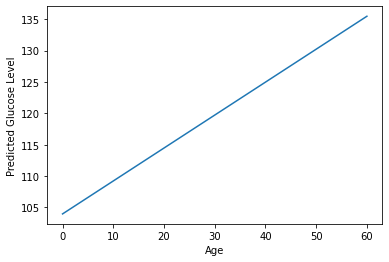

In [13]:
#Generate space in age category
x_space = np.linspace(0,60,100)

#Create a DataFrame for our prediction points
pred_df = pd.DataFrame({"Pregnancies": [means[0] for i in range(100)],
                        "BloodPressure": [means[2] for i in range(100)],
                        "SkinThickness": [means[3] for i in range(100)],
                        "Insulin": [means[4] for i in range(100)],
                        "BMI": [means[5] for i in range(100)],
                        "DiabetesPedigreeFunction": [means[6] for i in range(100)],
                        "Age" : x_space,
                        "Outcome": [means[8] for i in range(100)]})

pred_space = reg.predict(pred_df)

#Plot Line
plt.plot(x_space, pred_space)

#Label axes
plt.xlabel("Age")
plt.ylabel("Predicted Glucose Level")

## Viewing Weights (Coefficients) 

In [14]:
print(reg.coef_)

print(reg.intercept_)

[-0.77131702  0.10525219 -0.24863633  0.08795123  0.26225038 -0.09535431
  0.52533586 26.48321929]
80.0518526010266


As can be seen in the code cell above, the weights and intercept for this model are displayed. This means that our equation for the regression line is:

$$ y = -0.77X_1 + 0.105X_2 - 0.249X_3 + 0.0880X_4 + 0.262X_5 - 0.0954X_6 + 0.525X_7 + 26.5$$

The glucose level for any known $X_1$ through $X_7$ value can therefore be estimated. Remember from above that the first column in the DataFrame referred to the number of pregnancies, so this is variable $X_1$.

## Predictions

To make further use of the model, we can predict new dependent variable values. This can be done with any measured independent variable values.

Here, we choose mean values for each, and see what the prediction for this is. This prediction is 121, and although the units are not given with the dataset, we can assume this to be a standard g/L.

In [15]:
means = np.mean(df.drop(["Glucose"], axis=1))

means

Pregnancies                  3.730539
BloodPressure               69.260479
SkinThickness               20.631737
Insulin                     80.615269
BMI                         32.141766
DiabetesPedigreeFunction     0.472317
Age                         33.064371
Outcome                      0.345808
dtype: float64

In [16]:
#Making an example prediction

#Our example point will be at the mean all dependent variables

#Predict y value - means is first changed to a numpy array and then reshaped to fit the function
predicted_y = reg.predict(np.array(means).reshape(1, -1))

predicted_y

array([121.33682635])

# References

Things that I've referenced go here, to be cleaned up later

- [1] https://stats.stackexchange.com/questions/210168/what-is-the-difference-between-r2-and-variance-score-in-scikit-learn
- SciKit-Learn
- Numpy
- Kaggle dataset
- Multicollinearity source - https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea